In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy.fftpack import fft
%matplotlib inline

In [2]:
# sine 
Tot=30
dt=0.001
T=np.arange(dt,Tot,dt)
x_set=[]
fsin=[30,20,10,5]
for i in range(len(fsin)):
    x=np.sin(T*fsin[i]*2*math.pi)
    x_set.append(x)

(10, 10.1)

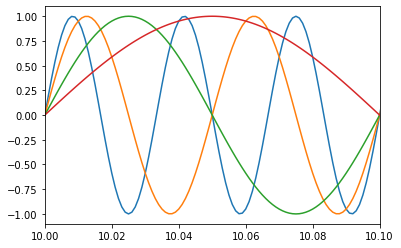

In [3]:
for i in range(len(fsin)):
    plt.plot(T,x_set[i])
plt.xlim(10,10.1)

In [4]:
y_set=[]
z_set=[]
for i in range(np.size(x_set,0)):
    x=x_set[i]
#     alpha = 60.
#     beta =  2
#     K = 30.
#     g = 30.
    alpha = 20
    beta =  0.62
    K = 10
    g = 30
    y=np.zeros(len(T))
    z=np.zeros(len(T))
    for j in range(len(T)-1):
        dy=dt*(-alpha*y[j]+K*(x[j]-z[j]))
        dz=dt*(-beta*z[j]+g*y[j])
        y[j+1]=y[j]+dy
        z[j+1]=z[j]+dz
    y_set.append(y)
    z_set.append(z)

In [5]:
# same scale
for i in range(np.size(x_set,0)):
    x_set[i]=x_set[i]/np.std(x_set[i])
    y_set[i]=y_set[i]/np.std(y_set[i])
    z_set[i]=z_set[i]/np.std(z_set[i])

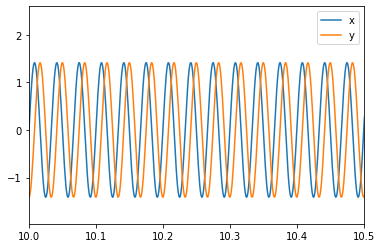

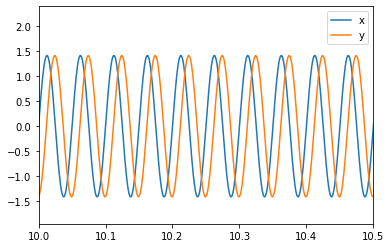

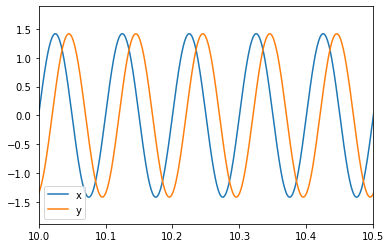

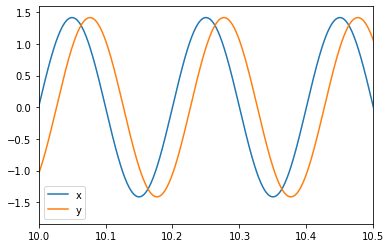

In [6]:
for i in range(np.size(x_set,0)):
    plt.plot(T,x_set[i])
    plt.plot(T,y_set[i])
#     plt.plot(T,z_set[i])
    plt.xlim(10,10.5)
    plt.legend(('x','y'))
    plt.show()

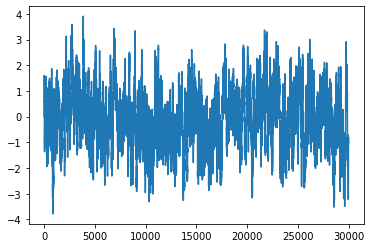

In [7]:
# generate OU
Tot=300
dt=0.01
T=np.arange(dt,Tot,dt)
tau=0.6
D = 4
L=np.zeros(len(T))
mu, sigma = 0, 1
for i in range(len(T)-1):
    L[i+1]=L[i]*(1-dt/tau)+math.sqrt(D*dt)*np.random.normal(mu,sigma)
    
plt.plot(L)
    
# # filtering
# fc=[10,7,4,2]
# x_set=[L]
# for ifc in range(len(fc)):
#     b, a = signal.butter(2, 2*fc[ifc]*dt, btype='low', analog=False)
#     Lf = signal.filtfilt(b, a, L)
#     x_set.append(Lf)
    
# for i in range(np.size(x_set,0)):
#     plt.plot(T,x_set[i])
# plt.xlim(150,152)

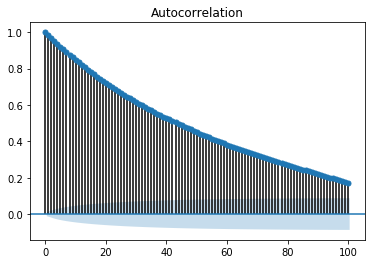

In [10]:
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(L, lags=100)
plt.show()

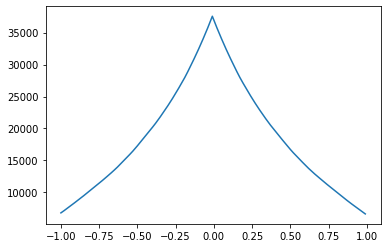

In [12]:
corr=np.correlate(L,L,'same')
plt.plot(np.arange(-100,100)*dt,corr[round((len(L)+1)/2)-100:round((len(L)+1)/2)+100])